<a href="https://colab.research.google.com/github/harshithamadarapu/Team16_Hinglish-Auto-suggestions/blob/main/NLP_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

df = pd.read_csv('/content/nlptrain.csv')

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text

df['phrases'] = df['phrases'].apply(preprocess_text)

print(df.head())

df.to_csv('/content/lowercase_nlptrain.csv', index=False)

                                             phrases
0                               film ka kya naam hai
1  namaste sada hua tomatoes score mahaan hai lek...
2  kya aapako lagata hai ki aapako film pasand aa...
3                        yah kis tarah kee philm hai
4                                film kab banee thee


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
common_hindi_words = ['mera', 'kya', 'tum', 'hai', 'hum', 'mein', 'ho', 'kya', 'ko', 'wala', 'raha', 'hoon', 'aap', 'sab', 'ki', 'ka', 'hai', 'tho', 'jab', 'tumhe', 'kar', 'karenge']

In [ ]:
def is_hindi(word):
    if word.lower() in common_hindi_words:
        return True
    hindi_vowel_patterns = re.compile(r'[aeiou]{2,}')
    if hindi_vowel_patterns.search(word):
        return True
    return False

In [ ]:

english_words = 0
hindi_words = 0
all_words = []

for phrase in df['phrases']:
    if isinstance(phrase, str):
        tokens = phrase.split()
        for token in tokens:
            if is_hindi(token):
                hindi_words += 1
            else:
                english_words += 1
            all_words.append(token)
    else:
        continue

print(f"English words: {english_words}")
print(f"Hindi words: {hindi_words}")

English words: 1177983
Hindi words: 477370


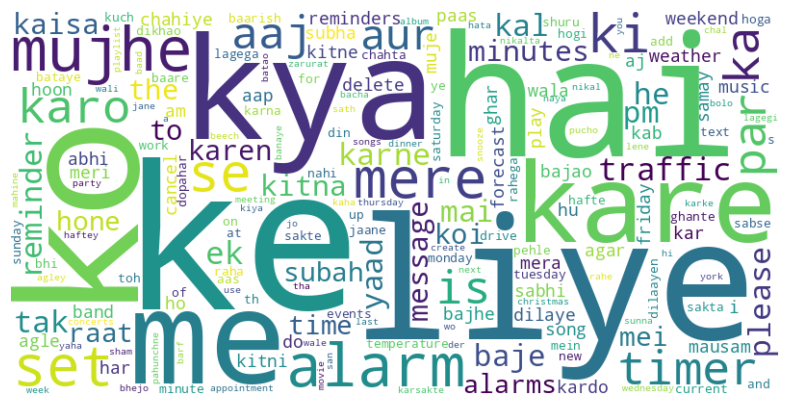

In [ ]:

word_freq = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
most_common_words = word_freq.most_common(10)
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words:
ke: 81318
liye: 55985
hai: 55913
ko: 55262
kya: 38535
me: 32989
kare: 28297
mujhe: 23965
alarm: 23196
mere: 20463


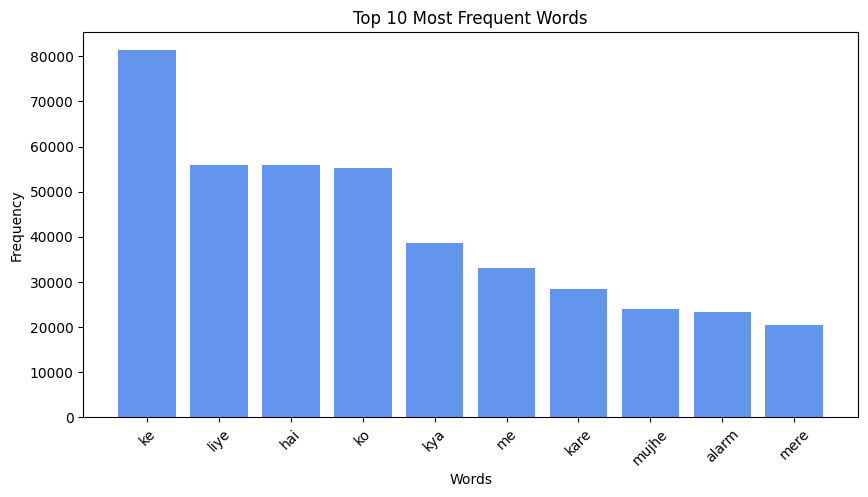

In [ ]:
# Plotting
most_common_filtered = word_freq.most_common(10)
words, counts = zip(*most_common_filtered)

# Ploting the top 10 most frequent words
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='cornflowerblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
unique_words = set(all_words)

print(f"Total number of unique words: {len(unique_words)}")

Total number of unique words: 38357
